In [117]:
import pandas as pd
import bs4
import urllib
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pysent3 as ps

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnnyjheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
data = pd.read_csv('url.csv', header = 0)
data

,url,class,color
0,https://english.president.gov.tw/News/6175,col-sm-8,lightgreen
1,https://www.mac.gov.tw/en/News_Content.aspx?n=...,p,royalblue
2,http://www.gwytb.gov.cn/wyly/201904/t20190412_...,Custom_UnionStyle,crimson


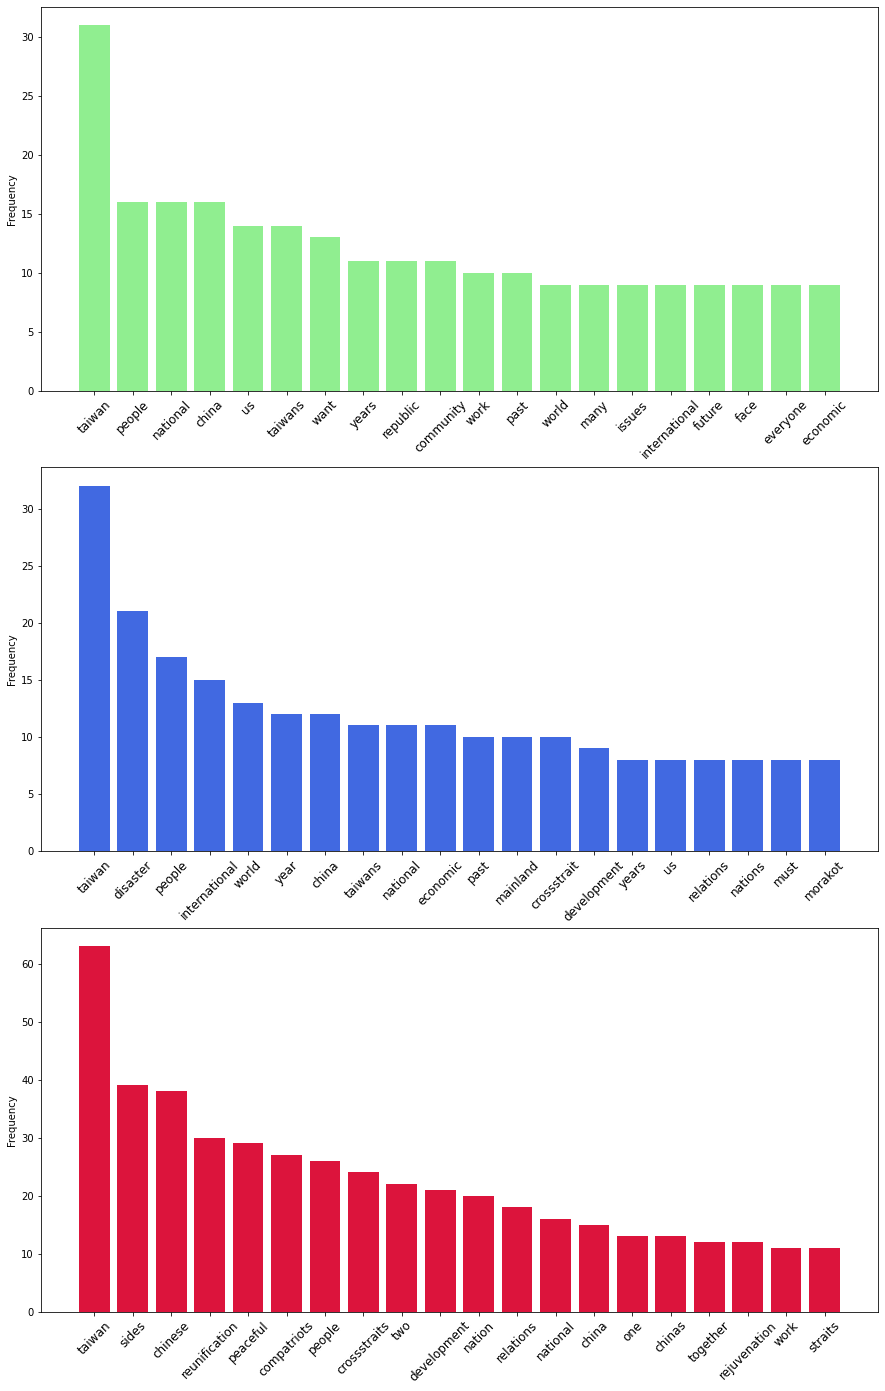

In [120]:
url = []
url_class = []
url_color = []
Total = 3
Output = []
score = []
for i in range(0,Total):
    url.append(data.iloc[i,0])
    url_class.append(data.iloc[i,1])
    url_color.append(data.iloc[i,2])
    raw_html        = urllib.request.urlopen(url[i])
    parsed_html     = bs4.BeautifulSoup(raw_html, "lxml")
    text            = parsed_html.find_all("div", class_ = url_class[i])

    textl = []
    for j in text:
        textl.append(j.get_text())

    cleantextprep = str(textl[0])

    expression      = "[^a-zA-Z0-9 ]"
    cleantextCAP    = re.sub(expression, "", cleantextprep)
    cleantext       = cleantextCAP.lower()

    dat = list(cleantext.split())
    dict1 = {}
    for j in range(len(dat)):
        word = dat[j]
        dict1[word] = dat.count(word)
    keys = list(dict1) 
    filtered_words = [word for word in keys if word not in stopwords.words('english')] 
    dict2 = dict((k, dict1[k]) for k in filtered_words if k in filtered_words)
    def SequenceSelection(dictionary, length, startindex = 0):
 
        if length > len(dictionary): 
            return print("input length is too long"); 
        else: 
            d = dictionary 
            items = [(v, k) for k, v in d.items()] 
            items.sort() 
            items.reverse() 
            itemsOut = [(k, v) for v, k in items] 

            highest = itemsOut[startindex:startindex + length] 
            dd = dict(highest) 
            wanted_keys = dd.keys() 
            dictshow = dict((k, d[k]) for k in wanted_keys if k in d) 
            return dictshow 
 
    dictshow = SequenceSelection(dictionary = dict2, length = 20, startindex = 0)
    Output.append(dictshow)
    hiv4 = ps.HIV4()
    tokens = hiv4.tokenize(cleantext)
    score.append(hiv4.get_score(tokens))

plt.figure(figsize=(15,8*Total))
for i in range(0,Total):
    plt.subplot(Total,1,i+1)
    plt.bar((Output[i].keys()), Output[i].values(), color=url_color[i])
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, fontsize=12)


plt.savefig("Different Parties Leader's Speech Comparison")
plt.show()

In [135]:
parties = []
for i in range(0,Total):
    if url_color[i] == "lightgreen":
        parties.append("DDP")
    elif url_color[i] == "royalblue":
        parties.append("KMT")
    elif url_color[i] == "crimson":
        parties.append("CPC")
score_index = pd.DataFrame(parties)
score_table = pd.DataFrame(score, index = score_index)
display(score_table)

,Positive,Negative,Polarity,Subjectivity
"(DDP,)",357,147,0.416667,0.169298
"(KMT,)",421,178,0.405676,0.177639
"(CPC,)",497,108,0.642975,0.191820


In [147]:
display(score_table.iloc[2,:])

Positive        497.000000
Negative        108.000000
Polarity          0.642975
Subjectivity      0.191820
Name: (CPC,), dtype: float64